In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [1]:

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


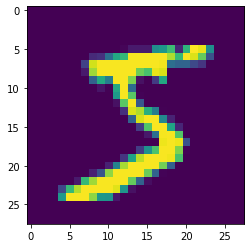

In [8]:
first = X[0].reshape((28, 28))
plt.imshow(first)

In [10]:
y[0]

'5'

In [14]:
y = y.astype(np.int)

In [15]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [21]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [22]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [29]:
clf = SGDClassifier()
clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
test_amount = 100

predict = clf.predict(X_train[0:test_amount])
# print(predict)
# print(y_train_5[0:test_amount])
accuracy = (np.sum((y_train_5[0:test_amount] == predict)) / test_amount) * 100
print(f"{accuracy}%")

99.0%


In [56]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96795, 0.96475, 0.9041 ])

In [59]:
class NeverFiveClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return [False] * len(X)
    
never_five = NeverFiveClassifier()

cross_val_score(never_five, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [62]:
y_train_pred = cross_val_predict(clf, X_train, y_train_5, cv=3)

In [63]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [67]:
conf_matrix = confusion_matrix(y_train_5, y_train_pred)
conf_matrix

array([[53956,   623],
       [ 1481,  3940]], dtype=int64)

In [72]:
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

In [71]:
precision = true_positives / (true_positives + false_positives)

In [73]:
recall = true_positives / (true_positives + false_negatives)

In [74]:
print(f"Precision: {precision}, Recall: {recall}")

Precision: 0.8634670173131712, Recall: 0.7268031728463383


In [77]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))


0.8634670173131712
0.7268031728463383


In [78]:
true_positives / (true_positives + ((false_negatives + false_positives) / 2))

0.7892628205128205

In [95]:
from sklearn.metrics import f1_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
f1_score(y_train_5, y_train_pred)

0.8543764523625097
0.8138719793396052


0.8336324988190836

In [93]:
y_train_pred = clf.predict(X_train)
f1_score(y_train_5, y_train_pred)

0.8336324988190836

In [86]:
y_scores = clf.decision_function(X_train)
y_scores

array([  1690.86213818,  -7119.67205483, -15134.29204045, ...,
         4113.02322089,  -3559.9631017 ,  -6500.50248554])

In [97]:
threshold = 0
y_scores_threshold = y_scores > threshold

In [98]:
y_scores_threshold
print(precision_score(y_train_5, y_scores_threshold))
print(recall_score(y_train_5, y_scores_threshold))
f1_score(y_train_5, y_scores_threshold)

0.8543764523625097
0.8138719793396052


0.8336324988190836

In [99]:
threshold = 8000
y_scores_threshold = y_scores > threshold
print(precision_score(y_train_5, y_scores_threshold))
print(recall_score(y_train_5, y_scores_threshold))
f1_score(y_train_5, y_scores_threshold)

0.9873949579831933
0.04334993543626637


0.08305354302880368

In [100]:
y_scores = cross_val_predict(clf, X_train, y_train_5, cv=3, method="decision_function")

In [101]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

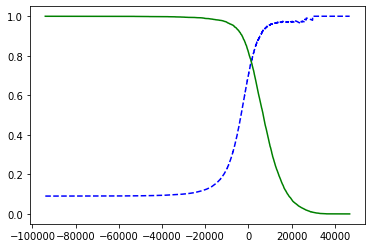

In [102]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold, add the legend, axis label and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [103]:
thresholds

array([-94058.98072137, -93911.67253271, -93217.94404229, ...,
        36128.9759624 ,  43285.47258126,  46859.99689074])

In [104]:
precisions

array([0.09043591, 0.09042074, 0.09042225, ..., 1.        , 1.        ,
       1.        ])

In [105]:
recalls

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

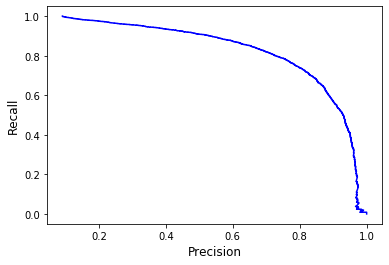

In [111]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(precisions[:-1], recalls[:-1], "b-")
    plt.xlabel('Precision', fontsize=12)
    plt.ylabel('Recall', fontsize=12)

plot_precision_vs_recall(precisions, recalls)
plt.show()

In [112]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [114]:
precisions >= 0.90

array([False, False, False, ...,  True,  True,  True])

In [115]:
np.argmax(precisions >= 0.90)

56510

In [113]:
threshold_90_precision

5422.837475167397

In [119]:
threshold = threshold_90_precision
y_train_pred_90 = y_scores >= threshold
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))
f1_score(y_train_5, y_train_pred_90)

0.9000873871249636
0.570005534034311


0.6979896092161734

In [120]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

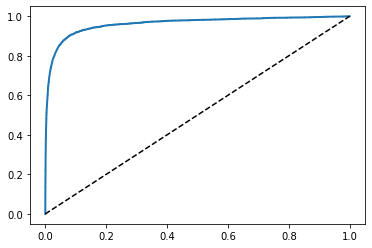

In [121]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    [...] # Add axis labels and grid
    
plot_roc_curve(fpr, tpr)
plt.show()

In [122]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9614375786450823

In [123]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [125]:
y_probas_forest

array([[0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ]])

In [127]:
y_scores_forest = y_probas_forest[:, 1]
y_scores_forest

array([0.9, 0. , 0.1, ..., 1. , 0. , 0. ])

In [128]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

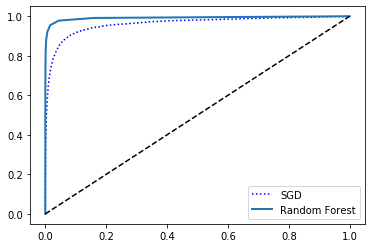

In [129]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [130]:
roc_auc_score(y_train_5, y_scores_forest)

0.9920527492698306

In [133]:
y_scores_forest_bool = y_scores_forest > 0.5

In [134]:
print(precision_score(y_train_5, y_scores_forest_bool))
print(recall_score(y_train_5, y_scores_forest_bool))
f1_score(y_train_5, y_scores_forest_bool)

0.986046511627907
0.8212506917542889


0.8961352657004831

In [138]:
some_digit = X_train[0]
clf = SGDClassifier(verbose=2, n_jobs=-1)
clf.fit(X_train, y_train) # y_train, not y_train_5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1

Norm: 7072.40, NNZs: 639, Bias: -170.445967, T: 60000, Avg. loss: 78863.673921
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 6501.47, NNZs: 611, Bias: -243.047090, T: 60000, Avg. loss: 88943.942084
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 6879.45, NNZs: 616, Bias: -177.770788, T: 60000, Avg. loss: 38185.056647
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 7941.99, NNZs: 623, Bias: 62.114802, T: 60000, Avg. loss: 90668.257148
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 6110.64, NNZs: 602, Bias: -123.442967, T: 60000, Avg. loss: 42925.354082
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 5891.19, NNZs: 597, Bias: -24.850490, T: 60000, Avg. loss: 46579.091900
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4817.27, NNZs: 569, Bias: -10.114293, T: 60000, Avg. loss: 23123.769241
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 7252.93, NNZs: 643, Bias: -127.0647

Norm: 1158.48, NNZs: 680, Bias: -210.382343, T: 660000, Avg. loss: 1490.393167
Total training time: 1.51 seconds.
-- Epoch 12
Norm: 1399.17, NNZs: 648, Bias: -223.134135, T: 660000, Avg. loss: 617.117348
Total training time: 1.52 seconds.
-- Epoch 12
Norm: 1448.85, NNZs: 660, Bias: 90.420273, T: 660000, Avg. loss: 1778.085791
Total training time: 1.52 seconds.
-- Epoch 12
Norm: 977.07, NNZs: 633, Bias: -18.636222, T: 660000, Avg. loss: 373.925558
Total training time: 1.50 seconds.
-- Epoch 12
Norm: 1330.32, NNZs: 671, Bias: -155.335267, T: 660000, Avg. loss: 1018.794122
Total training time: 1.53 seconds.
-- Epoch 12
Norm: 1115.16, NNZs: 628, Bias: -175.361684, T: 660000, Avg. loss: 910.481441
Total training time: 1.51 seconds.
-- Epoch 12
Norm: 1020.14, NNZs: 643, Bias: -31.701260, T: 660000, Avg. loss: 896.059147
Total training time: 1.51 seconds.
-- Epoch 12
Norm: 1084.41, NNZs: 639, Bias: -339.897226, T: 660000, Avg. loss: 1942.123318
Total training time: 1.56 seconds.
-- Epoch 12
N

Norm: 659.08, NNZs: 638, Bias: -20.329395, T: 1200000, Avg. loss: 192.805653
Total training time: 2.68 seconds.
-- Epoch 21
Norm: 907.27, NNZs: 652, Bias: -231.807285, T: 1200000, Avg. loss: 333.261689
Total training time: 2.73 seconds.
-- Epoch 21
Norm: 729.17, NNZs: 630, Bias: -187.577347, T: 1200000, Avg. loss: 488.209633
Total training time: 2.70 seconds.
-- Epoch 21
Norm: 749.15, NNZs: 682, Bias: -220.947973, T: 1200000, Avg. loss: 799.564398
Total training time: 2.74 seconds.
-- Epoch 21
Norm: 853.93, NNZs: 676, Bias: -161.246070, T: 1200000, Avg. loss: 524.535586
Total training time: 2.75 seconds.
-- Epoch 21
Norm: 923.93, NNZs: 662, Bias: 98.352938, T: 1200000, Avg. loss: 947.097030
Total training time: 2.76 seconds.
-- Epoch 21
Norm: 668.45, NNZs: 647, Bias: -32.729470, T: 1200000, Avg. loss: 479.435133
Total training time: 2.73 seconds.
-- Epoch 21
Norm: 710.37, NNZs: 644, Bias: -362.165559, T: 1200000, Avg. loss: 1033.183393
Total training time: 2.81 seconds.
-- Epoch 21
Nor

Norm: 520.50, NNZs: 638, Bias: -21.319010, T: 1740000, Avg. loss: 125.277023
Total training time: 3.88 seconds.
-- Epoch 30
Norm: 557.09, NNZs: 649, Bias: -374.882610, T: 1680000, Avg. loss: 735.750346
Total training time: 3.92 seconds.
-- Epoch 29
Norm: 697.91, NNZs: 655, Bias: -237.293768, T: 1740000, Avg. loss: 227.933880
Total training time: 3.93 seconds.
-- Epoch 30
Norm: 563.40, NNZs: 682, Bias: -227.118648, T: 1740000, Avg. loss: 545.258880
Total training time: 3.93 seconds.
-- Epoch 30
Norm: 569.05, NNZs: 630, Bias: -194.756015, T: 1740000, Avg. loss: 325.457595
Total training time: 3.90 seconds.
-- Epoch 30
Norm: 705.50, NNZs: 662, Bias: 103.067597, T: 1740000, Avg. loss: 653.537353
Total training time: 3.97 seconds.
-- Epoch 30
Norm: 518.62, NNZs: 650, Bias: -33.213461, T: 1740000, Avg. loss: 312.587309
Total training time: 3.94 seconds.
-- Epoch 30
Norm: 648.74, NNZs: 676, Bias: -164.643408, T: 1740000, Avg. loss: 362.243305
Total training time: 3.98 seconds.
-- Epoch 30
Nor

Norm: 552.42, NNZs: 678, Bias: -166.878043, T: 2220000, Avg. loss: 275.551331
Total training time: 5.10 seconds.
-- Epoch 38
Norm: 585.17, NNZs: 666, Bias: 106.067867, T: 2220000, Avg. loss: 510.005175
Total training time: 5.10 seconds.
-- Epoch 38
Norm: 440.21, NNZs: 643, Bias: -22.043740, T: 2280000, Avg. loss: 99.190064
Total training time: 5.08 seconds.
-- Epoch 39
Norm: 467.95, NNZs: 632, Bias: -200.102938, T: 2280000, Avg. loss: 250.286631
Total training time: 5.12 seconds.
-- Epoch 39
Norm: 459.91, NNZs: 682, Bias: -231.510518, T: 2280000, Avg. loss: 408.547382
Total training time: 5.18 seconds.
-- Epoch 39
Norm: 458.64, NNZs: 653, Bias: -384.877629, T: 2220000, Avg. loss: 564.588120
Total training time: 5.18 seconds.
-- Epoch 38
Norm: 565.49, NNZs: 655, Bias: -241.085061, T: 2280000, Avg. loss: 170.729543
Total training time: 5.18 seconds.
-- Epoch 39
Norm: 427.38, NNZs: 652, Bias: -33.671352, T: 2280000, Avg. loss: 244.960526
Total training time: 5.18 seconds.
-- Epoch 39
Norm

Norm: 398.42, NNZs: 654, Bias: -392.057377, T: 2700000, Avg. loss: 451.319448
Total training time: 6.28 seconds.
-- Epoch 46
Norm: 376.40, NNZs: 653, Bias: -34.002868, T: 2760000, Avg. loss: 202.467213
Total training time: 6.27 seconds.
-- Epoch 47
Norm: 468.44, NNZs: 679, Bias: -168.890743, T: 2760000, Avg. loss: 224.367632
Total training time: 6.32 seconds.
-- Epoch 47
Norm: 382.00, NNZs: 650, Bias: -22.460378, T: 2820000, Avg. loss: 82.011586
Total training time: 6.30 seconds.
-- Epoch 48
Norm: 494.46, NNZs: 669, Bias: 108.647496, T: 2760000, Avg. loss: 401.250400
Total training time: 6.34 seconds.
-- Epoch 47
Norm: 405.61, NNZs: 632, Bias: -204.182237, T: 2820000, Avg. loss: 200.566448
Total training time: 6.32 seconds.
-- Epoch 48
Norm: 479.19, NNZs: 657, Bias: -244.076357, T: 2820000, Avg. loss: 132.875536
Total training time: 6.37 seconds.
-- Epoch 48
Norm: 384.46, NNZs: 682, Bias: -235.042256, T: 2820000, Avg. loss: 329.524250
Total training time: 6.37 seconds.
-- Epoch 48
Norm

Norm: 328.08, NNZs: 653, Bias: -34.355541, T: 3300000, Avg. loss: 172.417662
Total training time: 7.47 seconds.
-- Epoch 56
Norm: 349.23, NNZs: 655, Bias: -398.703109, T: 3240000, Avg. loss: 381.545196
Total training time: 7.50 seconds.
-- Epoch 55
Norm: 338.83, NNZs: 650, Bias: -22.797739, T: 3360000, Avg. loss: 67.174902
Total training time: 7.49 seconds.
-- Epoch 57
Norm: 353.29, NNZs: 632, Bias: -207.557668, T: 3360000, Avg. loss: 168.343763
Total training time: 7.53 seconds.
-- Epoch 57
Norm: 410.38, NNZs: 680, Bias: -170.524649, T: 3300000, Avg. loss: 194.468137
Total training time: 7.57 seconds.
-- Epoch 56
Norm: 431.91, NNZs: 669, Bias: 110.829059, T: 3300000, Avg. loss: 334.156104
Total training time: 7.57 seconds.
-- Epoch 56
Norm: 333.62, NNZs: 686, Bias: -237.798329, T: 3360000, Avg. loss: 282.606922
Total training time: 7.58 seconds.
-- Epoch 57
Norm: 422.05, NNZs: 660, Bias: -246.435120, T: 3360000, Avg. loss: 114.476751
Total training time: 7.60 seconds.
-- Epoch 57
Norm

Norm: 381.29, NNZs: 661, Bias: -248.274297, T: 3840000, Avg. loss: 98.221964
Total training time: 8.70 seconds.
-- Epoch 65
Norm: 307.61, NNZs: 655, Bias: -23.137145, T: 3900000, Avg. loss: 57.942086
Total training time: 8.71 seconds.
-- Epoch 66
Norm: 297.25, NNZs: 653, Bias: -34.639623, T: 3840000, Avg. loss: 144.306106
Total training time: 8.71 seconds.
-- Epoch 65
Norm: 312.36, NNZs: 655, Bias: -404.289255, T: 3780000, Avg. loss: 323.200670Norm: 315.66, NNZs: 632, Bias: -210.473299, T: 3900000, Avg. loss: 147.904339
Total training time: 8.74 seconds.

Total training time: 8.77 seconds.
-- Epoch 64
-- Epoch 66
Norm: 297.42, NNZs: 688, Bias: -240.151268, T: 3900000, Avg. loss: 237.603476
Total training time: 8.78 seconds.
-- Epoch 66
Norm: 388.60, NNZs: 669, Bias: 112.664152, T: 3840000, Avg. loss: 282.738571
Total training time: 8.78 seconds.
-- Epoch 65
Norm: 367.67, NNZs: 680, Bias: -171.836986, T: 3840000, Avg. loss: 159.627213
Total training time: 8.80 seconds.
-- Epoch 65
Norm:

Norm: 288.87, NNZs: 632, Bias: -212.690493, T: 4380000, Avg. loss: 130.470444Norm: 288.67, NNZs: 655, Bias: -408.493430, T: 4260000, Avg. loss: 284.090053
Total training time: 9.86 seconds.

Total training time: 9.83 seconds.
-- Epoch 72
-- Epoch 74
Norm: 275.72, NNZs: 688, Bias: -242.059773, T: 4380000, Avg. loss: 213.758798
Total training time: 9.88 seconds.
-- Epoch 74
Norm: 336.01, NNZs: 680, Bias: -172.916839, T: 4320000, Avg. loss: 143.143528
Total training time: 9.90 seconds.
-- Epoch 73
Norm: 353.89, NNZs: 671, Bias: 114.093218, T: 4320000, Avg. loss: 250.254603
Total training time: 9.90 seconds.
-- Epoch 73
Norm: 346.90, NNZs: 663, Bias: -250.120767, T: 4380000, Avg. loss: 85.248236
Total training time: 9.92 seconds.
-- Epoch 74
Norm: 281.49, NNZs: 655, Bias: -23.391491, T: 4440000, Avg. loss: 50.293208
Total training time: 9.90 seconds.
-- Epoch 75
Norm: 270.17, NNZs: 655, Bias: -34.758855, T: 4380000, Avg. loss: 127.666976
Total training time: 9.92 seconds.
-- Epoch 74
Norm:

Norm: 252.47, NNZs: 655, Bias: -34.937726, T: 4860000, Avg. loss: 111.362874
Total training time: 11.01 seconds.
-- Epoch 82
Norm: 266.18, NNZs: 632, Bias: -214.892839, T: 4920000, Avg. loss: 115.624284
Total training time: 11.04 seconds.
-- Epoch 83
Norm: 264.74, NNZs: 658, Bias: -412.763164, T: 4800000, Avg. loss: 253.900958
Total training time: 11.12 seconds.
-- Epoch 81
Norm: 252.56, NNZs: 688, Bias: -243.972352, T: 4920000, Avg. loss: 184.976547
Total training time: 11.13 seconds.
-- Epoch 83
Norm: 318.12, NNZs: 664, Bias: -251.676495, T: 4920000, Avg. loss: 77.162309
Total training time: 11.13 seconds.
-- Epoch 83
Norm: 308.36, NNZs: 680, Bias: -173.892888, T: 4860000, Avg. loss: 126.303902
Total training time: 11.14 seconds.
-- Epoch 82
Norm: 324.31, NNZs: 671, Bias: 115.563821, T: 4860000, Avg. loss: 230.896321
Norm: 261.21, NNZs: 655, Bias: -23.655481, T: 4980000, Avg. loss: 45.806159
Total training time: 11.11 seconds.
-- Epoch 84
Total training time: 11.15 seconds.
-- Epoch 

Norm: 235.71, NNZs: 656, Bias: -35.118265, T: 5340000, Avg. loss: 107.105060
Total training time: 12.24 seconds.
-- Epoch 90
Norm: 235.04, NNZs: 688, Bias: -245.446308, T: 5400000, Avg. loss: 170.850758
Norm: 296.00, NNZs: 664, Bias: -252.907517, T: 5400000, Avg. loss: 72.544894
Total training time: 12.30 seconds.
-- Epoch 91
Total training time: 12.30 seconds.
-- Epoch 91
Norm: 302.42, NNZs: 671, Bias: 116.715991, T: 5340000, Avg. loss: 208.747962
Total training time: 12.32 seconds.
-- Epoch 90
Norm: 287.94, NNZs: 680, Bias: -174.684961, T: 5340000, Avg. loss: 113.912084
Total training time: 12.32 seconds.
-- Epoch 90
Norm: 247.25, NNZs: 655, Bias: -23.839746, T: 5460000, Avg. loss: 41.259734
Total training time: 12.30 seconds.
-- Epoch 92
Norm: 246.83, NNZs: 658, Bias: -416.145906, T: 5280000, Avg. loss: 226.542919
Total training time: 12.34 seconds.
-- Epoch 89
Norm: 247.62, NNZs: 632, Bias: -216.834725, T: 5460000, Avg. loss: 102.651894
Total training time: 12.34 seconds.
-- Epoch 

Norm: 231.57, NNZs: 655, Bias: -24.037241, T: 6000000, Avg. loss: 37.118576
Total training time: 13.49 seconds.
-- Epoch 101
Norm: 267.91, NNZs: 681, Bias: -175.505530, T: 5880000, Avg. loss: 104.840413
Total training time: 13.53 seconds.
-- Epoch 99
Norm: 281.18, NNZs: 673, Bias: 117.904453, T: 5880000, Avg. loss: 186.022036
Total training time: 13.53 seconds.
-- Epoch 99
Norm: 216.63, NNZs: 688, Bias: -246.997307, T: 5940000, Avg. loss: 154.233089
Total training time: 13.54 seconds.
-- Epoch 100
Norm: 277.06, NNZs: 664, Bias: -254.225458, T: 5940000, Avg. loss: 65.440636
Total training time: 13.55 seconds.
-- Epoch 100
Norm: 229.16, NNZs: 632, Bias: -218.556332, T: 6000000, Avg. loss: 93.043725
Total training time: 13.53 seconds.
-- Epoch 101
Norm: 231.72, NNZs: 662, Bias: -419.516521, T: 5820000, Avg. loss: 205.156765
Total training time: 13.57 seconds.
-- Epoch 98
Norm: 219.80, NNZs: 656, Bias: -35.265456, T: 5940000, Avg. loss: 91.235802
Total training time: 13.60 seconds.
-- Epoc

Norm: 219.63, NNZs: 662, Bias: -422.254038, T: 6300000, Avg. loss: 194.090081
Total training time: 14.69 seconds.
-- Epoch 106
Norm: 209.42, NNZs: 656, Bias: -35.393265, T: 6420000, Avg. loss: 84.613994
Total training time: 14.67 seconds.
-- Epoch 108
Norm: 219.17, NNZs: 655, Bias: -24.202599, T: 6540000, Avg. loss: 33.752843
Total training time: 14.69 seconds.
-- Epoch 110
Norm: 250.83, NNZs: 681, Bias: -176.255199, T: 6420000, Avg. loss: 95.123710
Total training time: 14.73 seconds.
-- Epoch 108
Norm: 257.14, NNZs: 664, Bias: -255.371136, T: 6480000, Avg. loss: 57.652688
Total training time: 14.73 seconds.
-- Epoch 109
Norm: 203.70, NNZs: 688, Bias: -248.397541, T: 6480000, Avg. loss: 138.053547
Total training time: 14.75 seconds.
-- Epoch 109
Norm: 264.25, NNZs: 673, Bias: 118.984506, T: 6420000, Avg. loss: 173.547039
Total training time: 14.75 seconds.
-- Epoch 108
Norm: 214.69, NNZs: 633, Bias: -220.189368, T: 6540000, Avg. loss: 87.455615
Total training time: 14.73 seconds.
-- Ep

Norm: 199.93, NNZs: 656, Bias: -35.553348, T: 6960000, Avg. loss: 78.647911
Total training time: 15.88 seconds.
-- Epoch 117
Norm: 208.31, NNZs: 655, Bias: -24.342391, T: 7080000, Avg. loss: 30.570653
Total training time: 15.92 seconds.
-- Epoch 119
Norm: 191.74, NNZs: 692, Bias: -249.682674, T: 7020000, Avg. loss: 132.194977
Total training time: 15.95 seconds.Norm: 207.65, NNZs: 667, Bias: -425.056619, T: 6840000, Avg. loss: 176.210492
Total training time: 15.95 seconds.

-- Epoch 115
-- Epoch 118
Norm: 240.46, NNZs: 664, Bias: -256.426432, T: 7020000, Avg. loss: 53.282964
Total training time: 15.96 seconds.
-- Epoch 118
Norm: 236.85, NNZs: 681, Bias: -176.955039, T: 6960000, Avg. loss: 90.243620
Total training time: 15.96 seconds.
-- Epoch 117
Norm: 250.23, NNZs: 673, Bias: 119.929005, T: 6960000, Avg. loss: 158.975583
Total training time: 15.98 seconds.
-- Epoch 117
Norm: 202.30, NNZs: 633, Bias: -221.722825, T: 7080000, Avg. loss: 80.493290
Total training time: 15.96 seconds.
-- Ep

Norm: 198.18, NNZs: 655, Bias: -24.505408, T: 7620000, Avg. loss: 30.799106
Total training time: 17.13 seconds.
-- Epoch 128
Norm: 189.54, NNZs: 657, Bias: -35.674317, T: 7500000, Avg. loss: 73.844936
Total training time: 17.14 seconds.
-- Epoch 126
Norm: 180.04, NNZs: 692, Bias: -250.834869, T: 7560000, Avg. loss: 118.382217
Total training time: 17.18 seconds.
-- Epoch 127
Norm: 228.62, NNZs: 664, Bias: -257.382065, T: 7560000, Avg. loss: 48.669737
Total training time: 17.19 seconds.
-- Epoch 127
Norm: 223.33, NNZs: 682, Bias: -177.603164, T: 7500000, Avg. loss: 81.861167
Total training time: 17.20 seconds.
-- Epoch 126
Norm: 192.42, NNZs: 633, Bias: -223.071673, T: 7620000, Avg. loss: 73.500733
Total training time: 17.18 seconds.
-- Epoch 128
Norm: 236.82, NNZs: 673, Bias: 120.806937, T: 7500000, Avg. loss: 150.690202
Total training time: 17.23 seconds.
-- Epoch 126
Norm: 195.87, NNZs: 667, Bias: -427.582041, T: 7380000, Avg. loss: 162.647351
Total training time: 17.23 seconds.
-- Ep

Norm: 188.67, NNZs: 656, Bias: -24.648424, T: 8160000, Avg. loss: 26.549847
Total training time: 18.33 seconds.
-- Epoch 137
Norm: 172.43, NNZs: 692, Bias: -251.861300, T: 8100000, Avg. loss: 112.077484
Total training time: 18.39 seconds.
-- Epoch 136
Norm: 180.35, NNZs: 657, Bias: -35.759301, T: 8040000, Avg. loss: 69.456710
Total training time: 18.37 seconds.
-- Epoch 135
Norm: 2674.06, NNZs: 652, Bias: -805.234596, T: 240000, Avg. loss: 11267.391630
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 182.81, NNZs: 633, Bias: -224.313656, T: 8160000, Avg. loss: 70.649149
Total training time: 18.38 seconds.
-- Epoch 137
Norm: 212.38, NNZs: 682, Bias: -178.165710, T: 8040000, Avg. loss: 75.574409
Total training time: 18.41 seconds.
-- Epoch 135
Norm: 224.85, NNZs: 673, Bias: 121.609536, T: 8040000, Avg. loss: 136.116356
Total training time: 18.44 seconds.
-- Epoch 135
Norm: 185.76, NNZs: 667, Bias: -429.965549, T: 7920000, Avg. loss: 148.290743
Total training time: 18.44 seconds.
-- Ep

Norm: 6940.38, NNZs: 627, Bias: -271.439866, T: 60000, Avg. loss: 111060.454982
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 164.03, NNZs: 693, Bias: -252.857688, T: 8640000, Avg. loss: 104.669354
Total training time: 19.59 seconds.
-- Epoch 145
Norm: 174.89, NNZs: 634, Bias: -225.449447, T: 8700000, Avg. loss: 63.443317
Total training time: 19.57 seconds.
-- Epoch 146
Norm: 173.10, NNZs: 657, Bias: -35.849587, T: 8580000, Avg. loss: 64.207326
Total training time: 19.59 seconds.
-- Epoch 144
Norm: 202.52, NNZs: 682, Bias: -178.726016, T: 8580000, Avg. loss: 72.337258
Total training time: 19.65 seconds.
-- Epoch 144
Norm: 1069.51, NNZs: 668, Bias: -941.153299, T: 780000, Avg. loss: 3113.701586
Total training time: 1.82 seconds.
-- Epoch 14
Norm: 215.58, NNZs: 673, Bias: 122.387460, T: 8580000, Avg. loss: 129.136170
Total training time: 19.68 seconds.
-- Epoch 144
Norm: 177.79, NNZs: 667, Bias: -432.235043, T: 8460000, Avg. loss: 142.130797
Total training time: 19.69 seconds.
-- E

Norm: 206.52, NNZs: 673, Bias: 123.010050, T: 9060000, Avg. loss: 124.169263
Total training time: 20.71 seconds.
-- Epoch 152
Norm: 725.58, NNZs: 670, Bias: -995.477387, T: 1260000, Avg. loss: 1892.077887
Total training time: 2.88 seconds.
-- Epoch 22
Norm: 170.16, NNZs: 668, Bias: -434.080824, T: 8940000, Avg. loss: 131.960222
Total training time: 20.73 seconds.
-- Epoch 150
Norm: 157.16, NNZs: 693, Bias: -253.788506, T: 9180000, Avg. loss: 100.689425
Total training time: 20.74 seconds.
-- Epoch 154
Norm: 167.36, NNZs: 634, Bias: -226.583518, T: 9240000, Avg. loss: 60.541684
Total training time: 20.73 seconds.
-- Epoch 155
Norm: 1273.49, NNZs: 670, Bias: -387.494520, T: 600000, Avg. loss: 2684.627544
Total training time: 1.34 seconds.
-- Epoch 11
Norm: 194.29, NNZs: 682, Bias: -179.244276, T: 9120000, Avg. loss: 65.526355
Total training time: 20.80 seconds.
-- Epoch 153
Norm: 170.07, NNZs: 668, Bias: -434.307073, T: 9000000, Avg. loss: 133.599539
Total training time: 20.84 seconds.
--

Norm: 162.33, NNZs: 669, Bias: -436.490145, T: 9600000, Avg. loss: 123.821049
Total training time: 22.06 seconds.
-- Epoch 161
Norm: 196.92, NNZs: 673, Bias: 123.835138, T: 9720000, Avg. loss: 110.114730
Total training time: 22.07 seconds.
-- Epoch 163
Norm: 147.67, NNZs: 693, Bias: -254.848293, T: 9840000, Avg. loss: 94.005004
Total training time: 22.08 seconds.
-- Epoch 165
Norm: 159.43, NNZs: 634, Bias: -227.840312, T: 9900000, Avg. loss: 55.765517
Total training time: 22.05 seconds.
Norm: 520.99, NNZs: 673, Bias: -1042.538544, T: 1920000, Avg. loss: 1234.059713-- Epoch 166
Norm: 184.17, NNZs: 682, Bias: -179.840020, T: 9780000, Avg. loss: 63.424409
Total training time: 4.24 seconds.
-- Epoch 33

Total training time: 22.09 seconds.
-- Epoch 164
Norm: 725.50, NNZs: 675, Bias: -424.497322, T: 1260000, Avg. loss: 1236.610736
Total training time: 2.68 seconds.
-- Epoch 22
Norm: 162.05, NNZs: 669, Bias: -436.704039, T: 9660000, Avg. loss: 122.357838
Total training time: 22.16 seconds.
--

Norm: 432.72, NNZs: 676, Bias: -1070.147817, T: 2460000, Avg. loss: 947.726491
Total training time: 5.39 seconds.
-- Epoch 42
Norm: 545.11, NNZs: 679, Bias: -441.773252, T: 1800000, Avg. loss: 852.187143
Total training time: 3.84 seconds.
-- Epoch 31
Norm: 152.51, NNZs: 634, Bias: -228.896296, T: 10500000, Avg. loss: 55.254308
Total training time: 23.26 seconds.
-- Epoch 176
Norm: 155.94, NNZs: 670, Bias: -438.506195, T: 10200000, Avg. loss: 117.155837
Total training time: 23.30 seconds.
-- Epoch 171
Norm: 142.17, NNZs: 693, Bias: -255.722743, T: 10440000, Avg. loss: 86.013635
Total training time: 23.31 seconds.
-- Epoch 175
Norm: 188.56, NNZs: 673, Bias: 124.536475, T: 10320000, Avg. loss: 109.557801
Total training time: 23.31 seconds.
-- Epoch 173
Norm: 175.26, NNZs: 682, Bias: -180.334757, T: 10380000, Avg. loss: 59.001482
Total training time: 23.31 seconds.
-- Epoch 174
Norm: 423.50, NNZs: 676, Bias: -1072.776948, T: 2520000, Avg. loss: 920.153831
Total training time: 5.53 seconds.

Norm: 169.21, NNZs: 682, Bias: -180.783679, T: 10920000, Avg. loss: 52.782166
Total training time: 24.46 seconds.
-- Epoch 183
Norm: 182.97, NNZs: 673, Bias: 125.117027, T: 10860000, Avg. loss: 101.258579
Total training time: 24.46 seconds.
-- Epoch 182
Norm: 146.13, NNZs: 636, Bias: -229.912851, T: 11100000, Avg. loss: 49.937774
Total training time: 24.51 seconds.
-- Epoch 186
Norm: 363.45, NNZs: 680, Bias: -1094.355084, T: 3060000, Avg. loss: 766.104092
Total training time: 6.70 seconds.
-- Epoch 52
Norm: 441.55, NNZs: 682, Bias: -455.948914, T: 2400000, Avg. loss: 644.824583
Total training time: 5.11 seconds.
-- Epoch 41
Norm: 136.07, NNZs: 693, Bias: -256.564784, T: 11040000, Avg. loss: 83.178063
Total training time: 24.56 seconds.
-- Epoch 185
Norm: 149.86, NNZs: 670, Bias: -440.412345, T: 10800000, Avg. loss: 112.797679
Total training time: 24.58 seconds.
-- Epoch 181
Norm: 182.51, NNZs: 673, Bias: 125.177616, T: 10920000, Avg. loss: 101.810392
Total training time: 24.58 seconds.

Norm: 139.48, NNZs: 636, Bias: -230.954412, T: 11760000, Avg. loss: 48.115888
Total training time: 25.72 seconds.
-- Epoch 197
Norm: 368.92, NNZs: 682, Bias: -467.686788, T: 3060000, Avg. loss: 509.043391
Total training time: 6.36 seconds.
-- Epoch 52
Norm: 129.89, NNZs: 693, Bias: -257.462434, T: 11700000, Avg. loss: 77.442656
Total training time: 25.80 seconds.
-- Epoch 196
Norm: 143.38, NNZs: 670, Bias: -442.394738, T: 11460000, Avg. loss: 103.047964
Total training time: 25.80 seconds.
-- Epoch 192
Norm: 315.94, NNZs: 682, Bias: -1115.491954, T: 3720000, Avg. loss: 622.929942
Total training time: 7.95 seconds.
-- Epoch 63
Norm: 174.78, NNZs: 673, Bias: 125.842031, T: 11580000, Avg. loss: 94.427109
Total training time: 25.83 seconds.
-- Epoch 194
Norm: 139.22, NNZs: 636, Bias: -231.044321, T: 11820000, Avg. loss: 47.618274
Total training time: 25.81 seconds.
-- Epoch 198
Norm: 364.11, NNZs: 682, Bias: -468.628017, T: 3120000, Avg. loss: 486.350667
Total training time: 6.46 seconds.
N

Total training time: 27.12 seconds.
Convergence after 203 epochs took 27.12 seconds
Norm: 319.14, NNZs: 683, Bias: -477.903836, T: 3780000, Avg. loss: 410.441921
Total training time: 7.69 seconds.
-- Epoch 64
Norm: 167.54, NNZs: 673, Bias: 126.515166, T: 12300000, Avg. loss: 89.601960
Total training time: 27.15 seconds.
-- Epoch 206
Norm: 273.26, NNZs: 682, Bias: -1134.528756, T: 4440000, Avg. loss: 516.701222
Total training time: 9.33 seconds.
-- Epoch 75
Norm: 124.81, NNZs: 693, Bias: -258.408542, T: 12480000, Avg. loss: 73.638956
Total training time: 27.18 seconds.
-- Epoch 209
Norm: 316.84, NNZs: 683, Bias: -478.649022, T: 3840000, Avg. loss: 395.733711
Total training time: 7.78 seconds.
-- Epoch 65
Norm: 167.11, NNZs: 673, Bias: 126.571938, T: 12360000, Avg. loss: 91.084129
Total training time: 27.22 seconds.
-- Epoch 207
Norm: 271.36, NNZs: 682, Bias: -1135.960381, T: 4500000, Avg. loss: 514.353052
Total training time: 9.41 seconds.
-- Epoch 76
Norm: 124.41, NNZs: 693, Bias: -258

Norm: 235.02, NNZs: 685, Bias: -1155.531423, T: 5400000, Avg. loss: 418.909584
Total training time: 10.72 seconds.
-- Epoch 91
Norm: 118.56, NNZs: 693, Bias: -259.568861, T: 13500000, Avg. loss: 67.719902
Total training time: 28.63 seconds.
-- Epoch 226
Norm: 159.23, NNZs: 674, Bias: 127.440252, T: 13320000, Avg. loss: 82.072076
Total training time: 28.64 seconds.
-- Epoch 223
Norm: 273.54, NNZs: 683, Bias: -489.221071, T: 4800000, Avg. loss: 311.014570
Total training time: 9.22 seconds.
-- Epoch 81
Norm: 232.25, NNZs: 685, Bias: -1156.713572, T: 5460000, Avg. loss: 415.478974
Total training time: 10.83 seconds.
-- Epoch 92
Norm: 118.28, NNZs: 693, Bias: -259.640553, T: 13560000, Avg. loss: 67.325546
Total training time: 28.73 seconds.
-- Epoch 227
Norm: 158.49, NNZs: 674, Bias: 127.487455, T: 13380000, Avg. loss: 82.333225
Total training time: 28.73 seconds.
-- Epoch 224
Norm: 271.29, NNZs: 683, Bias: -489.796457, T: 4860000, Avg. loss: 311.835791
Total training time: 9.31 seconds.
--

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   30.0s remaining:   12.8s


Norm: 237.49, NNZs: 684, Bias: -498.293066, T: 5820000, Avg. loss: 257.574003
Total training time: 10.78 seconds.
-- Epoch 98
Norm: 111.89, NNZs: 693, Bias: -260.662595, T: 14580000, Avg. loss: 61.945987
Total training time: 30.24 seconds.
-- Epoch 244
Norm: 202.76, NNZs: 686, Bias: -1174.505719, T: 6480000, Avg. loss: 349.909802
Total training time: 12.41 seconds.
-- Epoch 109
Norm: 236.10, NNZs: 684, Bias: -498.734066, T: 5880000, Avg. loss: 254.631437
Total training time: 10.86 seconds.
-- Epoch 99
Norm: 111.36, NNZs: 693, Bias: -260.715303, T: 14640000, Avg. loss: 62.426797
Total training time: 30.34 seconds.
-- Epoch 245
Norm: 201.25, NNZs: 686, Bias: -1175.457980, T: 6540000, Avg. loss: 351.041925
Total training time: 12.51 seconds.
-- Epoch 110
Norm: 234.10, NNZs: 684, Bias: -499.204420, T: 5940000, Avg. loss: 253.121379
Total training time: 10.96 seconds.
-- Epoch 100
Norm: 110.71, NNZs: 693, Bias: -260.784150, T: 14700000, Avg. loss: 63.818522
Total training time: 30.42 second

Norm: 177.66, NNZs: 686, Bias: -1193.360941, T: 7800000, Avg. loss: 285.663233
Total training time: 14.31 seconds.
-- Epoch 131
Norm: 104.08, NNZs: 693, Bias: -261.950967, T: 15960000, Avg. loss: 58.374410
Total training time: 32.16 seconds.
-- Epoch 267
Norm: 205.28, NNZs: 684, Bias: -508.005476, T: 7200000, Avg. loss: 208.685065
Total training time: 12.73 seconds.
-- Epoch 121
Norm: 103.83, NNZs: 693, Bias: -262.011011, T: 16020000, Avg. loss: 56.330083
Total training time: 32.24 seconds.
-- Epoch 268
Norm: 176.83, NNZs: 686, Bias: -1194.127119, T: 7860000, Avg. loss: 288.407381
Total training time: 14.39 seconds.
-- Epoch 132
Norm: 203.95, NNZs: 684, Bias: -508.394085, T: 7260000, Avg. loss: 204.829171
Total training time: 12.82 seconds.
-- Epoch 122
Norm: 103.39, NNZs: 693, Bias: -262.068953, T: 16080000, Avg. loss: 56.815976
Total training time: 32.32 seconds.
-- Epoch 269
Norm: 175.09, NNZs: 686, Bias: -1194.902676, T: 7920000, Avg. loss: 282.271240
Total training time: 14.48 sec

Norm: 176.57, NNZs: 684, Bias: -517.490378, T: 8880000, Avg. loss: 164.838966
Total training time: 15.00 seconds.
-- Epoch 149
Norm: 152.19, NNZs: 686, Bias: -1212.638089, T: 9480000, Avg. loss: 232.096237
Total training time: 16.61 seconds.
-- Epoch 159
Norm: 175.83, NNZs: 684, Bias: -517.804515, T: 8940000, Avg. loss: 167.898302
Total training time: 15.08 seconds.
-- Epoch 150
Norm: 151.61, NNZs: 686, Bias: -1213.256321, T: 9540000, Avg. loss: 231.850362
Total training time: 16.70 seconds.
-- Epoch 160
Norm: 174.97, NNZs: 684, Bias: -518.121112, T: 9000000, Avg. loss: 165.593361
Total training time: 15.17 seconds.
-- Epoch 151
Norm: 150.63, NNZs: 686, Bias: -1213.869649, T: 9600000, Avg. loss: 228.826960
Total training time: 16.78 seconds.
-- Epoch 161
Norm: 173.70, NNZs: 684, Bias: -518.396809, T: 9060000, Avg. loss: 162.935839
Total training time: 15.26 seconds.
-- Epoch 152
Norm: 150.22, NNZs: 686, Bias: -1214.505117, T: 9660000, Avg. loss: 228.731324
Total training time: 16.87 se

Norm: 130.99, NNZs: 692, Bias: -1230.747756, T: 11460000, Avg. loss: 189.210321
Total training time: 19.28 seconds.
-- Epoch 192
Norm: 152.44, NNZs: 686, Bias: -526.530674, T: 10920000, Avg. loss: 134.436015
Total training time: 17.72 seconds.
-- Epoch 183
Norm: 130.38, NNZs: 692, Bias: -1231.232520, T: 11520000, Avg. loss: 189.256797
Total training time: 19.36 seconds.
-- Epoch 193
Norm: 151.83, NNZs: 686, Bias: -526.753507, T: 10980000, Avg. loss: 134.310959
Total training time: 17.79 seconds.
-- Epoch 184
Norm: 129.90, NNZs: 692, Bias: -1231.715599, T: 11580000, Avg. loss: 186.193311
Total training time: 19.42 seconds.
-- Epoch 194
Norm: 150.97, NNZs: 686, Bias: -526.978734, T: 11040000, Avg. loss: 134.015888
Total training time: 17.85 seconds.
-- Epoch 185
Norm: 129.15, NNZs: 692, Bias: -1232.202243, T: 11640000, Avg. loss: 185.675649
Total training time: 19.51 seconds.
-- Epoch 195
Norm: 150.94, NNZs: 686, Bias: -527.213593, T: 11100000, Avg. loss: 131.836078
Total training time: 

Norm: 115.49, NNZs: 692, Bias: -1245.402049, T: 13440000, Avg. loss: 156.905755
Total training time: 22.03 seconds.
-- Epoch 225
Norm: 135.26, NNZs: 686, Bias: -533.898282, T: 12960000, Avg. loss: 115.715208
Total training time: 20.49 seconds.
-- Epoch 217
Norm: 114.88, NNZs: 692, Bias: -1245.796227, T: 13500000, Avg. loss: 158.808856
Total training time: 22.11 seconds.
-- Epoch 226
Norm: 135.17, NNZs: 686, Bias: -534.084566, T: 13020000, Avg. loss: 112.865279
Total training time: 20.57 seconds.
-- Epoch 218
Norm: 114.37, NNZs: 692, Bias: -1246.183486, T: 13560000, Avg. loss: 155.860104
Total training time: 22.19 seconds.
-- Epoch 227
Norm: 134.66, NNZs: 686, Bias: -534.289909, T: 13080000, Avg. loss: 113.172068
Total training time: 20.64 seconds.
-- Epoch 219
Norm: 114.17, NNZs: 692, Bias: -1246.563138, T: 13620000, Avg. loss: 157.913993
Total training time: 22.27 seconds.
-- Epoch 228
Norm: 134.81, NNZs: 686, Bias: -534.471447, T: 13140000, Avg. loss: 110.864079
Total training time: 

Norm: 103.49, NNZs: 692, Bias: -1258.075258, T: 15540000, Avg. loss: 135.869285
Total training time: 24.77 seconds.
-- Epoch 260
Norm: 103.47, NNZs: 692, Bias: -1258.395712, T: 15600000, Avg. loss: 133.996435
Total training time: 24.86 seconds.
-- Epoch 261
Norm: 103.24, NNZs: 692, Bias: -1258.726453, T: 15660000, Avg. loss: 134.241811
Total training time: 24.94 seconds.
-- Epoch 262
Norm: 102.83, NNZs: 692, Bias: -1259.050213, T: 15720000, Avg. loss: 134.278452
Total training time: 25.02 seconds.
-- Epoch 263
Norm: 102.20, NNZs: 692, Bias: -1259.364483, T: 15780000, Avg. loss: 133.350232
Total training time: 25.11 seconds.
-- Epoch 264
Norm: 102.04, NNZs: 692, Bias: -1259.693373, T: 15840000, Avg. loss: 133.476532
Total training time: 25.19 seconds.
-- Epoch 265
Norm: 101.73, NNZs: 692, Bias: -1260.020388, T: 15900000, Avg. loss: 134.118349
Total training time: 25.27 seconds.
-- Epoch 266
Norm: 101.22, NNZs: 692, Bias: -1260.335501, T: 15960000, Avg. loss: 128.834218
Total training ti

Norm: 87.56, NNZs: 694, Bias: -1276.542604, T: 19500000, Avg. loss: 105.296849
Total training time: 29.72 seconds.
-- Epoch 326
Norm: 87.53, NNZs: 694, Bias: -1276.770957, T: 19560000, Avg. loss: 104.259217
Total training time: 29.79 seconds.
-- Epoch 327
Norm: 87.28, NNZs: 694, Bias: -1277.003722, T: 19620000, Avg. loss: 103.845657
Total training time: 29.87 seconds.
-- Epoch 328
Norm: 87.04, NNZs: 694, Bias: -1277.241874, T: 19680000, Avg. loss: 103.324233
Total training time: 29.94 seconds.
-- Epoch 329
Norm: 87.21, NNZs: 694, Bias: -1277.478299, T: 19740000, Avg. loss: 103.393212
Total training time: 30.02 seconds.
-- Epoch 330
Norm: 86.90, NNZs: 694, Bias: -1277.716524, T: 19800000, Avg. loss: 102.985681
Total training time: 30.10 seconds.
-- Epoch 331
Norm: 86.57, NNZs: 694, Bias: -1277.953017, T: 19860000, Avg. loss: 103.883195
Total training time: 30.18 seconds.
-- Epoch 332
Norm: 86.34, NNZs: 694, Bias: -1278.183274, T: 19920000, Avg. loss: 102.762221
Total training time: 30.2

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   49.3s finished


array([3])

In [141]:
print(clf.predict([some_digit])[0])
y_train[0]

3


5

In [143]:
some_digit_scores = clf.decision_function([some_digit])
some_digit_scores

array([[-16824.825939  , -28287.8900135 ,  -6412.5533535 ,
          3209.60324132, -20277.62616944,   1458.11522688,
        -20520.04204735, -18971.16599325,  -6528.40078571,
        -13027.52039138]])

In [144]:
np.argmax(some_digit_scores)

3

In [145]:
clf.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [146]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, n_jobs=-1))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5])

In [147]:
len(ovo_clf.estimators_)

45

In [148]:
forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [149]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])


C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5])

In [150]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [151]:
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)

array([0.87172565, 0.88064403, 0.88193229])

In [155]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)

array([0.89927015, 0.89844492, 0.89953493])

In [156]:
y_train_pred = cross_val_predict(clf, X_train_scaled, y_train, cv=3, n_jobs=-1)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5588,    0,   23,    8,    9,   45,   37,    6,  206,    1],
       [   0, 6409,   38,   25,    4,   43,    4,    8,  199,   12],
       [  27,   27, 5266,   95,   72,   26,   65,   37,  331,   12],
       [  23,   18,  121, 5253,    2,  206,   27,   41,  366,   74],
       [  10,   14,   49,   10, 5209,   12,   35,   27,  306,  170],
       [  28,   16,   32,  170,   54, 4456,   77,   16,  510,   62],
       [  31,   16,   44,    2,   43,   97, 5557,    4,  123,    1],
       [  21,   10,   53,   30,   49,   12,    3, 5706,  166,  215],
       [  17,   64,   48,   90,    3,  130,   24,   10, 5418,   47],
       [  25,   19,   31,   68,  119,   35,    1,  182,  330, 5139]],
      dtype=int64)

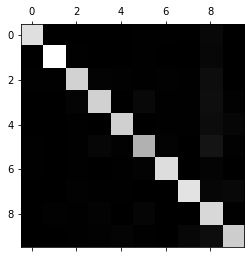

In [157]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [158]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

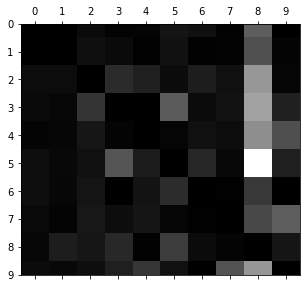

In [186]:
np.fill_diagonal(norm_conf_mx, 0)
plt.rcParams["figure.figsize"] = (5,5)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 10, 1))
plt.show()

In [190]:
np.sqrt(784)

28.0

In [196]:
(5 * 784) / 28

140.0

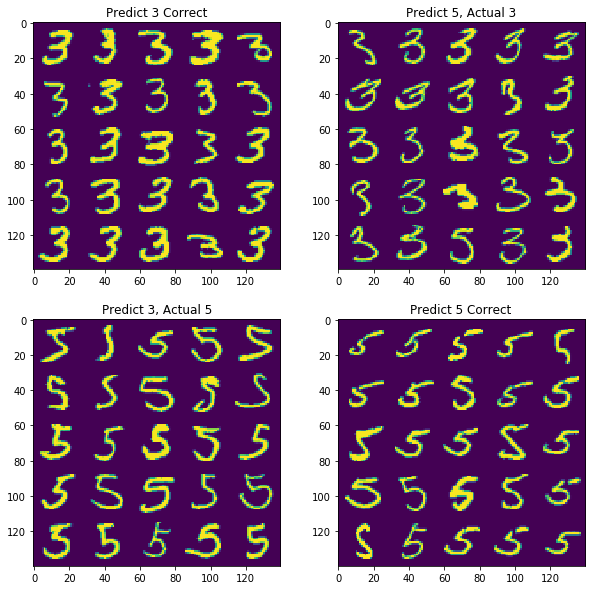

In [235]:
def plot_digits(numbers, images_per_row=5):
    shaped_numbers = numbers.reshape((25, 28, 28))
    all_numbers = None
    
    for i in range(0, len(numbers), 5):
        row_numbers = np.hstack(shaped_numbers[i:i+5])
    
        if all_numbers is None:
            all_numbers = row_numbers
        else:
            all_numbers = np.vstack((all_numbers, row_numbers))
            
    plt.imshow(all_numbers)
        
        

cl_a, cl_b = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(10,10))

ax1 = plt.subplot(221); ax1.title.set_text('Predict 3 Correct'); plot_digits(X_aa[:25], images_per_row=5)
ax2 = plt.subplot(222); ax2.title.set_text('Predict 5, Actual 3'); plot_digits(X_ab[:25], images_per_row=5)
ax3 = plt.subplot(223); ax3.title.set_text('Predict 3, Actual 5'); plot_digits(X_ba[:25], images_per_row=5)
ax4 = plt.subplot(224); ax4.title.set_text('Predict 5 Correct'); plot_digits(X_bb[:25], images_per_row=5)
plt.show()



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_jobs=-1, verbose=2)

# kn.fit(X_train, y_train)

In [ ]:
cross_val_score(kn, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)

In [ ]:
1+1